In [143]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
tasa_suicidios = pd.read_csv("master.csv", header="infer", sep=",")
tasa_suicidios.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [145]:
tasa_suicidios.shape

(27820, 12)

In [146]:
tasa_suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [147]:
tasa_suicidios.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [148]:
null_summary = (
    tasa_suicidios.isna().sum().reset_index()
    .rename(columns={"index": "variable", 0: "count"})
    .assign(percent = lambda x: 100 * x["count"] / tasa_suicidios.shape[0])
    .sort_values(by="count", ascending=True)
)

print(null_summary)

              variable  count    percent
0              country      0   0.000000
1                 year      0   0.000000
2                  sex      0   0.000000
3                  age      0   0.000000
4          suicides_no      0   0.000000
5           population      0   0.000000
6    suicides/100k pop      0   0.000000
7         country-year      0   0.000000
9    gdp_for_year ($)       0   0.000000
10  gdp_per_capita ($)      0   0.000000
11          generation      0   0.000000
8         HDI for year  19456  69.935298


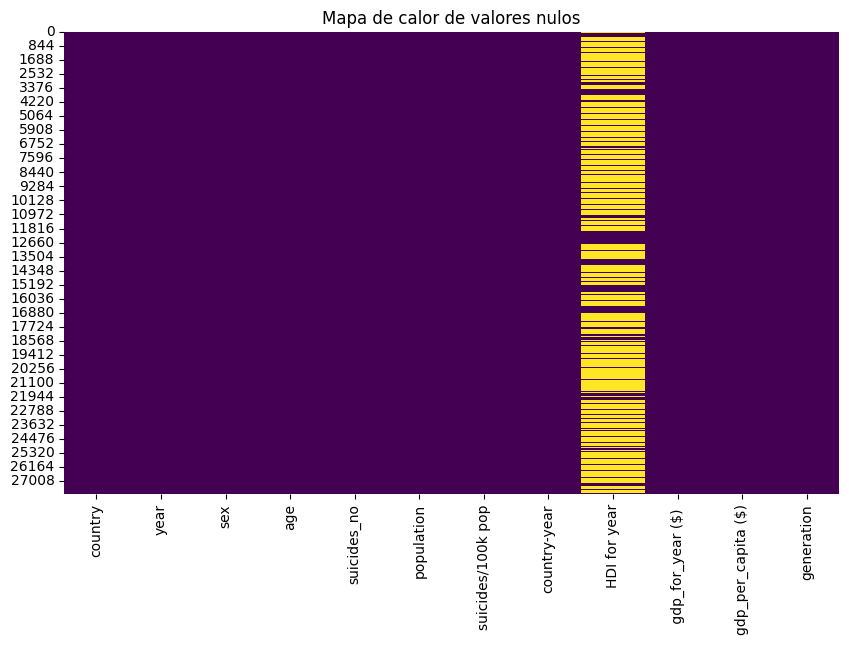

In [149]:
plt.figure(figsize=(10, 6))
sns.heatmap(tasa_suicidios.isna(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

üöß Solo la varible HDI for year tiene datos faltantes, con un porcentaje de 69,9%

In [112]:
## Calcular promedio de a√±o y pa√≠s para llenar los datos faltantes
tasa_suicidios['HDI for year'] = tasa_suicidios.groupby(['country', 'year'])['HDI for year'].transform(lambda x: x.fillna(x.mean()))

In [113]:
missing_values_after = tasa_suicidios['HDI for year'].isnull().sum()
missing_values_after

np.int64(19456)

üöß Aunque se intent√≥ sacar promedio de a√±o y pa√≠s para eliminar los datos faltantes siguen habiendo muchos datos a los cuales no se pudo sacar un promedio, por tanto, se tom√≥ la decisi√≥n de eliminar esta columna

In [114]:
tasa_suicidios.drop(columns=['HDI for year'], inplace=True)

In [115]:
tasa_suicidios.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  gdp_for_year ($)   gdp_per_capita ($)  \
0               6.71  Albania1987      2,156,624,900                 796   
1               5.19  Albania1987      2,156,624,900                 796   
2               4.83  Albania1987      2,156,624,900                 796   
3               4.59  Albania1987      2,156,624,900                 796   
4               3.28  Albania1987      2,156,624,900                 796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [116]:
tasa_suicidios.duplicated().sum()

np.int64(0)

üöß No existen datos duplicados

In [117]:
tasa_suicidios.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

In [118]:
tasa_suicidios.describe(include="object")

country    sex          age    country-year  gdp_for_year ($) 
count     27820  27820        27820           27820              27820
unique      101      2            6            2321               2321
top     Austria   male  15-24 years  Uzbekistan2014     63,067,077,179
freq        382  13910         4642              12                 12

‚ú®  Tasa de suicidios en cada pa√≠s

In [119]:
suicidios_por_pais = tasa_suicidios.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(10)
print("Total de suicidios por pa√≠s (Top 10):")
print(suicidios_por_pais)

Total de suicidios por pa√≠s (Top 10):
country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64


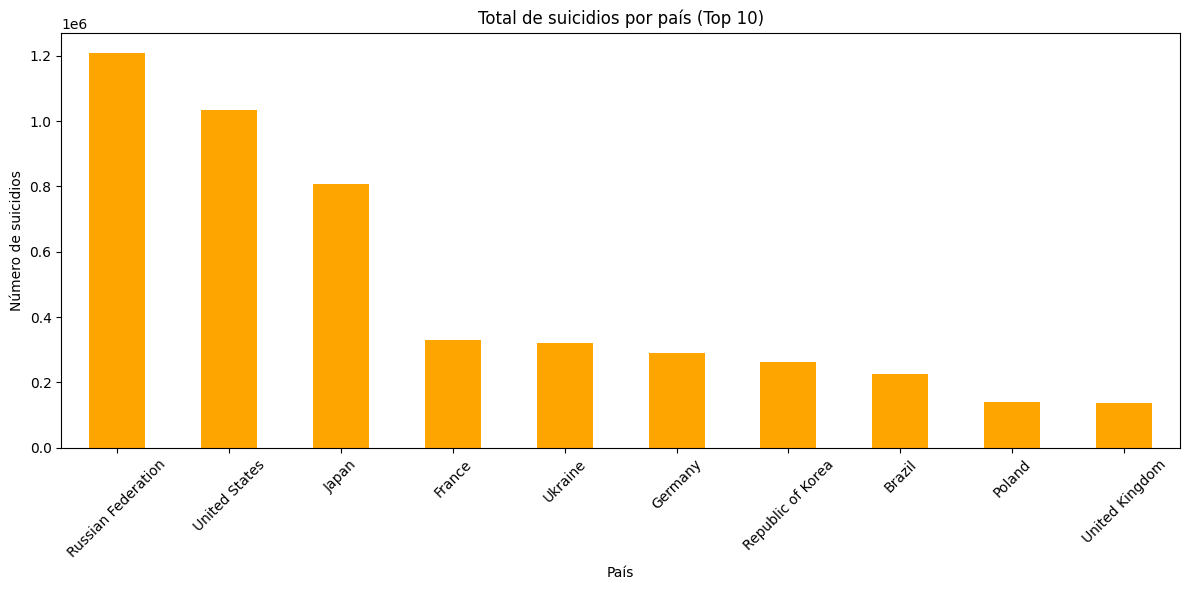

In [120]:
# Graficar los 10 pa√≠ses con m√°s suicidios
plt.figure(figsize=(12, 6))
suicidios_por_pais.plot(kind='bar', color='orange') 
plt.title('Total de suicidios por pa√≠s (Top 10)')
plt.xlabel('Pa√≠s')
plt.ylabel('N√∫mero de suicidios')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


C:\Users\carol\AppData\Local\Temp\ipykernel_73856\4015387293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_suicide.index, x=country_suicide.values, palette="GnBu")


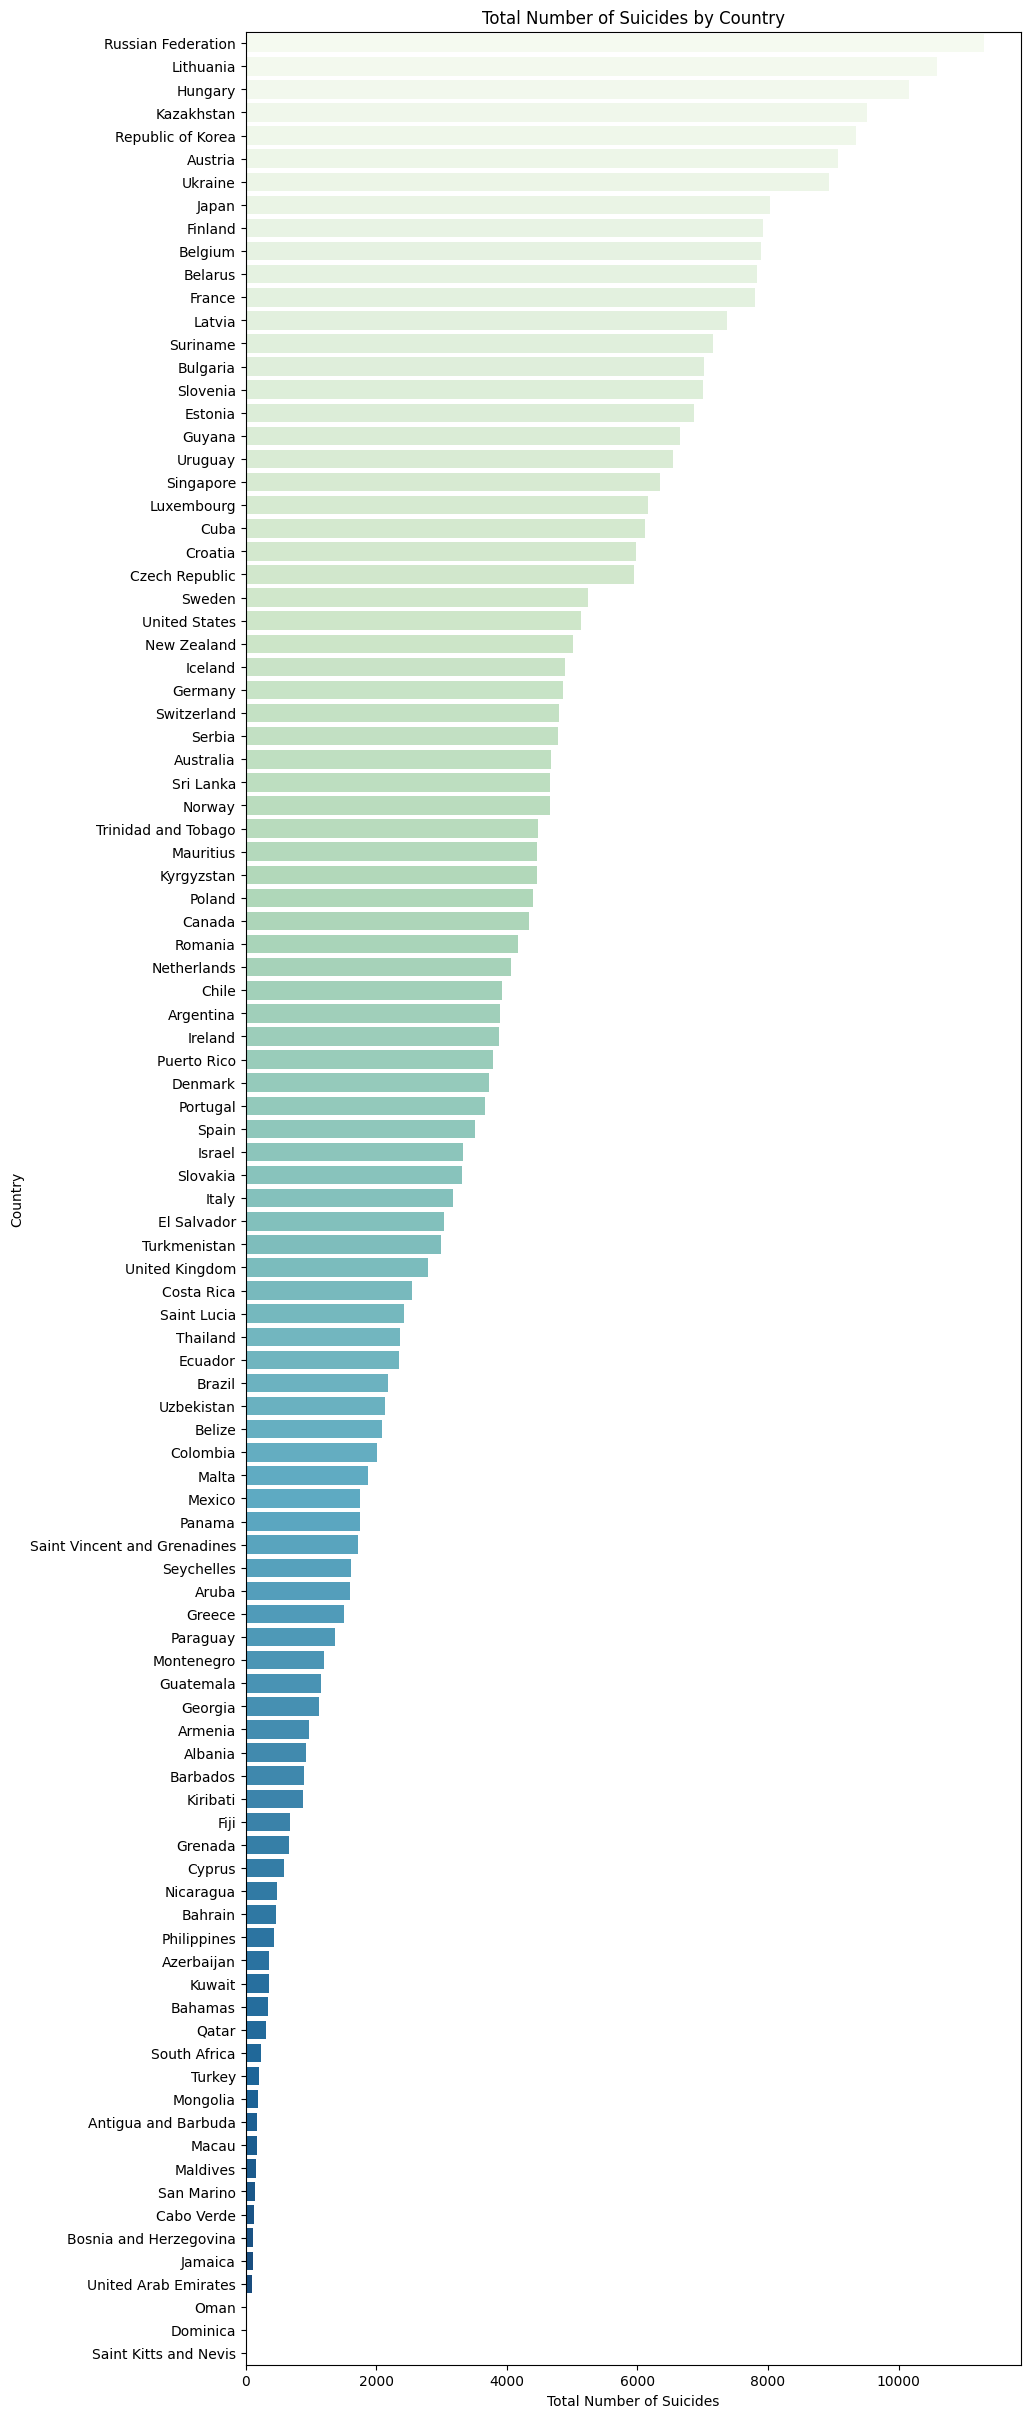

In [121]:
# Agrupar por pa√≠s y sumar el n√∫mero de suicidios (sin limitar a los 5 mayores)
country_suicide = tasa_suicidios.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False)

# Crear el gr√°fico de barras horizontal con todos los pa√≠ses
plt.figure(figsize=(10, len(country_suicide) * 0.3))  # Ajusta el tama√±o para acomodar todos los pa√≠ses
sns.barplot(y=country_suicide.index, x=country_suicide.values, palette="GnBu")
plt.ylabel("Country")
plt.xlabel("Total Number of Suicides")
plt.title("Total Number of Suicides by Country")

plt.show()


In [122]:
tasa_por_pais = tasa_suicidios.groupby('country')['suicides/100k pop'].mean().reset_index()

# Ordenar los datos por tasa de suicidios
tasa_por_pais = tasa_por_pais.sort_values(by='suicides/100k pop', ascending=False)

# Crear un gr√°fico de barras
fig = px.bar(
    tasa_por_pais,
    x='country',
    y='suicides/100k pop',
    title='Tasa de Suicidio por Pa√≠s (por 100k Habitantes)',
    labels={'suicides/100k pop': 'Tasa de Suicidio (por 100k)', 'country': 'Pa√≠s'},
    color='suicides/100k pop',  # Color basado en la tasa de suicidio
    color_continuous_scale=px.colors.sequential.Plasma  # Escala de color
)

# Mostrar el gr√°fico
fig.show()



In [124]:
import plotly.express as px

# Agrupar por pa√≠s y sumar el n√∫mero de suicidios
country_suicides = tasa_suicidios.groupby('country')['suicides_no'].sum().reset_index()

# Crear un mapa coropl√©tico
fig = px.choropleth(
    country_suicides,
    locations='country',
    locationmode='country names',
    color='suicides_no',
    title='N√∫mero de Suicidios por Pa√≠s',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Mostrar el gr√°fico
fig.show()


‚ú®  El siguiente gr√°ficos muestran la tasa de suiciodios a lo largo del tiempo

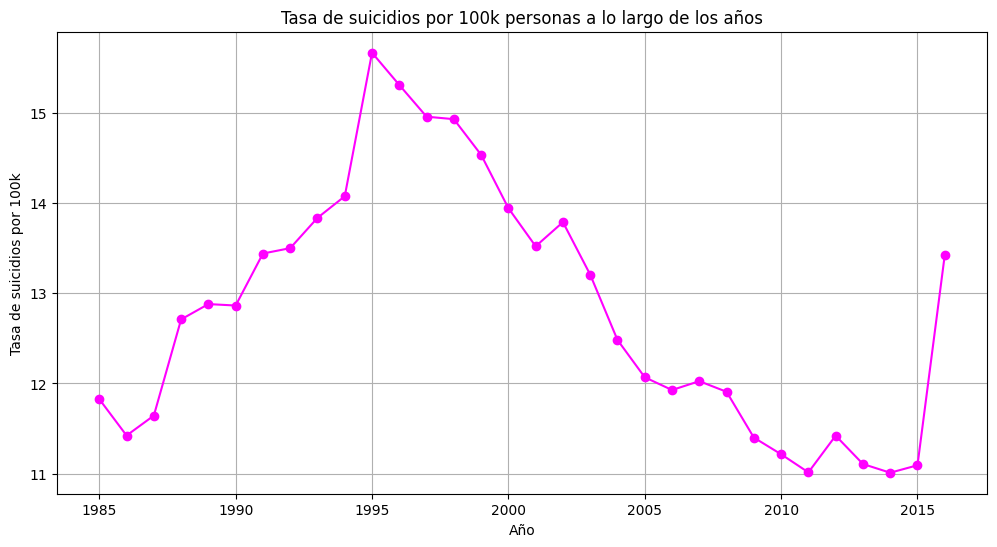

In [125]:
suicidios_tiempo = tasa_suicidios.groupby('year')['suicides/100k pop'].mean()
# Grafico de la tendencia a lo largo del tiempo
plt.figure(figsize=(12, 6))
suicidios_tiempo.plot(kind='line', marker='o', color='magenta')
plt.title('Tasa de suicidios por 100k personas a lo largo de los a√±os')
plt.xlabel('A√±o')
plt.ylabel('Tasa de suicidios por 100k')
plt.grid()
plt.show()

‚ú®  Los siguinetes gr√°ficos buscan mostrar los suicidios seg√∫n el g√©nero

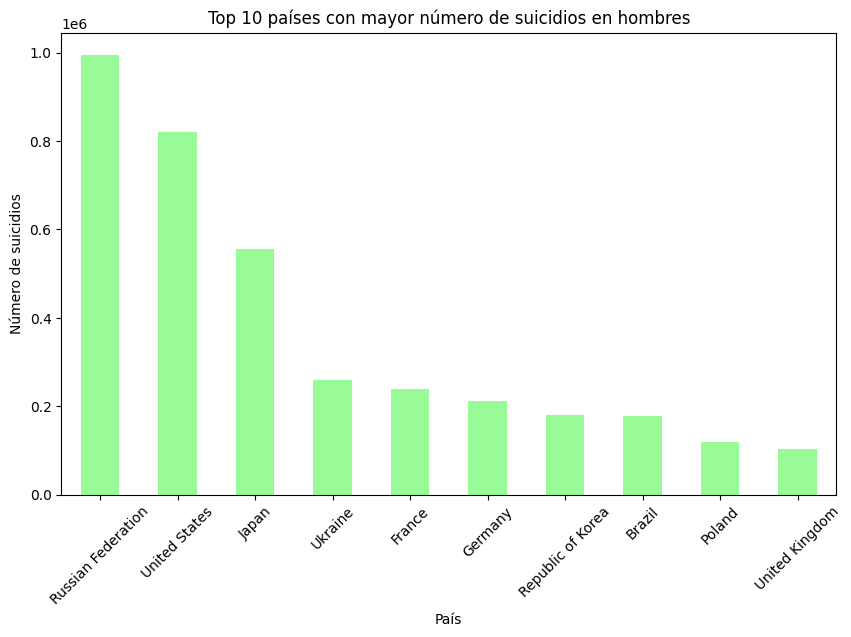

In [152]:
# Filtrar los datos para incluir solo suicidios de mujeres
data_male = tasa_suicidios[tasa_suicidios['sex'] == 'male']

# Agrupar por pa√≠s y sumar el n√∫mero de suicidios
suicides_by_country = data_male.groupby('country')['suicides_no'].sum()

# Ordenar en orden descendente y seleccionar los 10 primeros pa√≠ses
top_10_countries_female_suicides = suicides_by_country.sort_values(ascending=False).head(10)

# Crear gr√°fico de barras
plt.figure(figsize=(10, 6))
top_10_countries_female_suicides.plot(kind='bar', color='palegreen')
plt.title('Top 10 pa√≠ses con mayor n√∫mero de suicidios en hombres')
plt.xlabel('Pa√≠s')
plt.ylabel('N√∫mero de suicidios')
plt.xticks(rotation=45)
plt.show()

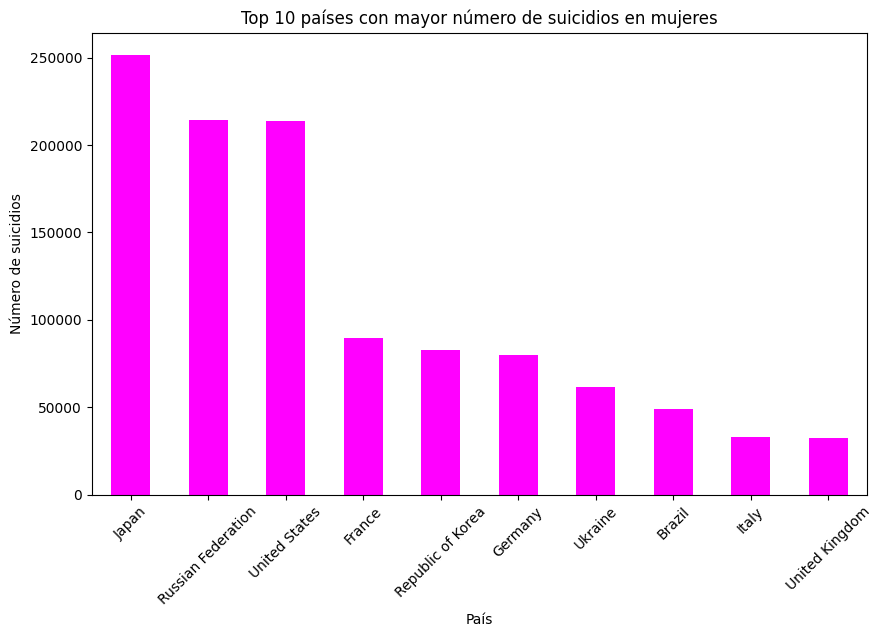

In [151]:
# Filtrar los datos para incluir solo suicidios de mujeres
data_female = tasa_suicidios[tasa_suicidios['sex'] == 'female']

# Agrupar por pa√≠s y sumar el n√∫mero de suicidios
suicides_by_country = data_female.groupby('country')['suicides_no'].sum()

# Ordenar en orden descendente y seleccionar los 10 primeros pa√≠ses
top_10_countries_female_suicides = suicides_by_country.sort_values(ascending=False).head(10)

# Crear gr√°fico de barras
plt.figure(figsize=(10, 6))
top_10_countries_female_suicides.plot(kind='bar', color='magenta')
plt.title('Top 10 pa√≠ses con mayor n√∫mero de suicidios en mujeres')
plt.xlabel('Pa√≠s')
plt.ylabel('N√∫mero de suicidios')
plt.xticks(rotation=45)
plt.show()

In [128]:
df_men = tasa_suicidios[tasa_suicidios['sex'] == "male"]
df_women = tasa_suicidios[tasa_suicidios['sex'] == "female"]

C:\Users\carol\AppData\Local\Temp\ipykernel_73856\2657605454.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\carol\AppData\Local\Temp\ipykernel_73856\2657605454.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




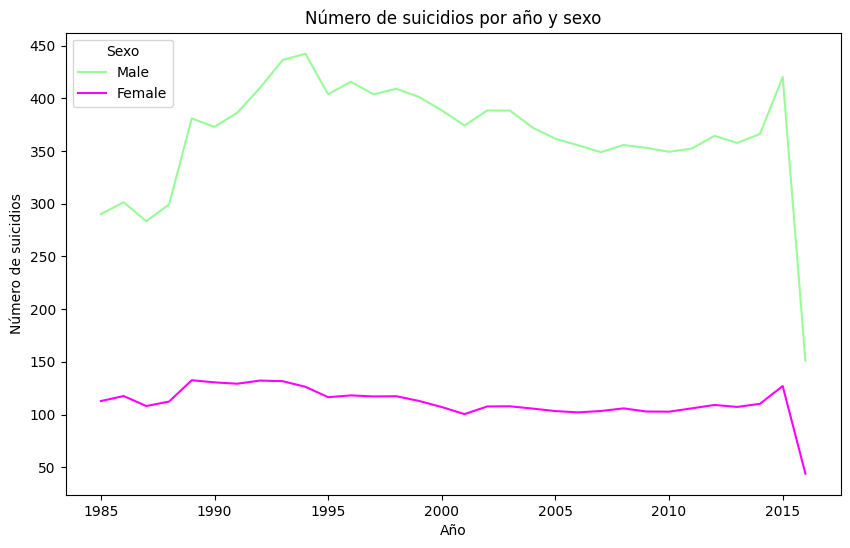

In [129]:
# Crear gr√°ficos de l√≠nea separados para hombres y mujeres
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_men, x="year", y="suicides_no", ci=None, label="Male", color="palegreen")
sns.lineplot(data=df_women, x="year", y="suicides_no", ci=None, label="Female", color="magenta")

# A√±adir t√≠tulo y etiquetas
plt.title("N√∫mero de suicidios por a√±o y sexo")
plt.xlabel("A√±o")
plt.ylabel("N√∫mero de suicidios")
plt.legend(title="Sexo")
plt.show()

In [130]:
suicidios_por_genero = tasa_suicidios.groupby('sex')['suicides_no'].sum()
print("\nTotal de suicidios por g√©nero:")
print(suicidios_por_genero)


Total de suicidios por g√©nero:
sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


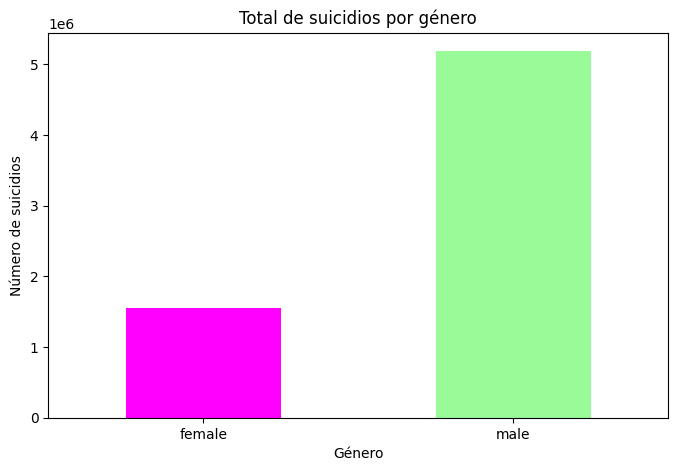

In [131]:
plt.figure(figsize=(8, 5))
suicidios_por_genero.plot(kind='bar', color=['magenta', 'palegreen'])
plt.title('Total de suicidios por g√©nero')
plt.xlabel('G√©nero')
plt.ylabel('N√∫mero de suicidios')
plt.xticks(rotation=0)
plt.show()

‚ú®  Los siguientes 2 gr√°fico muestra la distribuci√≥n de la tasa de suicidios, desglosada por generaci√≥n

In [132]:
orden_generaciones = ['Generation Z', 'Millennials', 'Generation X', 'Boomers', 'Silent', 'G.I. Generation']
tasa_suicidios['generation'] = pd.Categorical(tasa_suicidios['generation'], categories=orden_generaciones, ordered=True)
suicidios_por_generacion = tasa_suicidios.groupby('generation')['suicides_no'].sum()

print("Suicidios por generaci√≥n (ordenados cronol√≥gicamente):")
print(suicidios_por_generacion)


Suicidios por generaci√≥n (ordenados cronol√≥gicamente):
generation
Generation Z         15906
Millennials              0
Generation X       1532804
Boomers            2284498
Silent             1781744
G.I. Generation     510009
Name: suicides_no, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_73856\2093603075.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



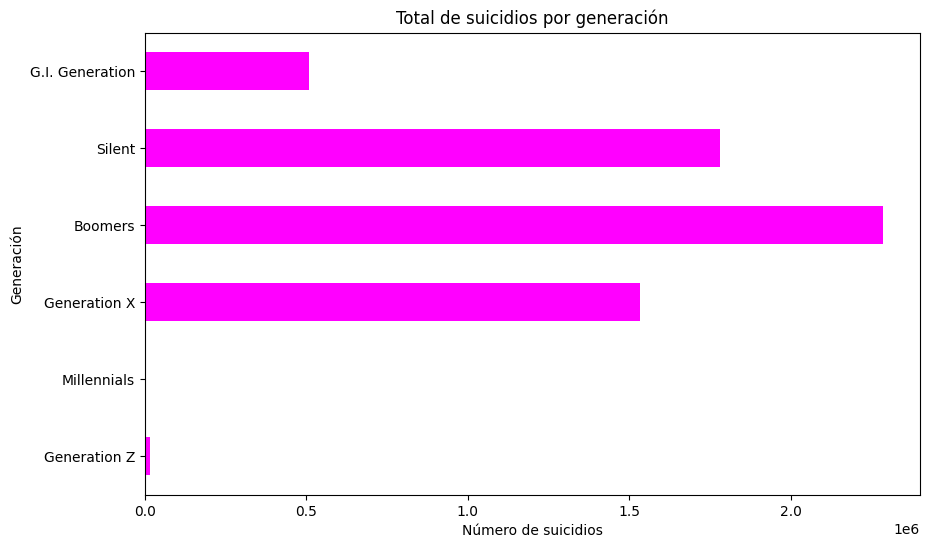

In [133]:
# Gr√°fico de barras horizontales para suicidios por generaci√≥n
plt.figure(figsize=(10, 6))
suicidios_por_generacion.plot(kind='barh', color='magenta')
plt.title('Total de suicidios por generaci√≥n')
plt.xlabel('N√∫mero de suicidios')
plt.ylabel('Generaci√≥n')
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_73856\1640414894.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




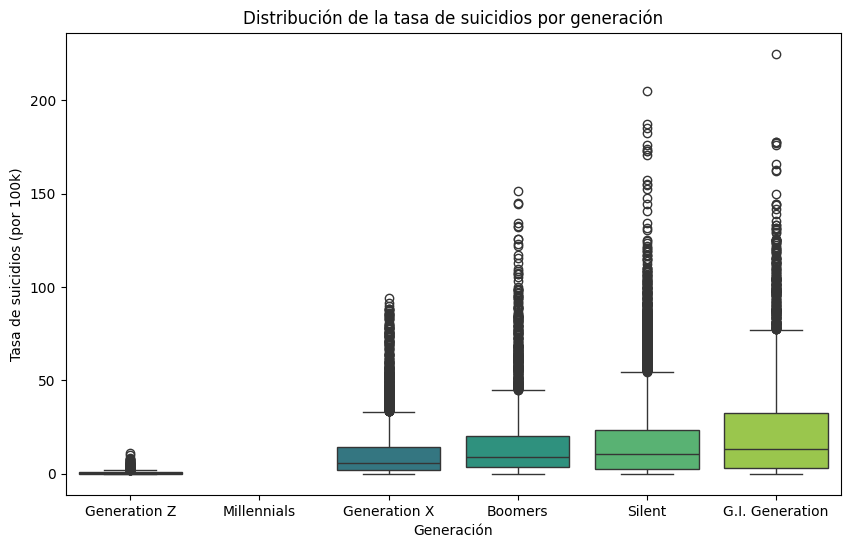

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tasa_suicidios, x='generation', y='suicides/100k pop', palette='viridis')
plt.title('Distribuci√≥n de la tasa de suicidios por generaci√≥n')
plt.xlabel('Generaci√≥n')
plt.ylabel('Tasa de suicidios (por 100k)')
plt.show()

‚ú®  Mapa de calor para evidenciar la edad en que las personas m√°s cometen suicidios 

C:\Users\carol\AppData\Local\Temp\ipykernel_73856\723916428.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



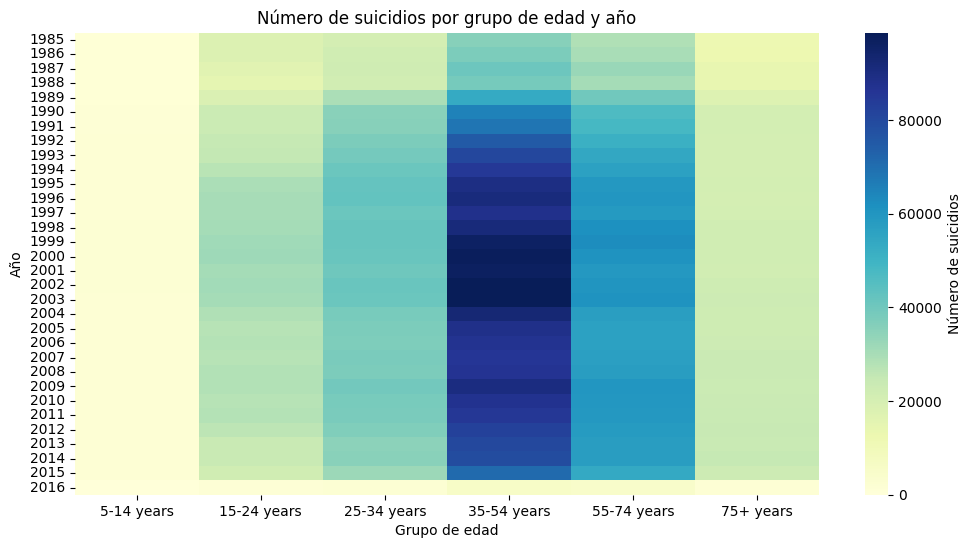

In [135]:
# Ordena los grupos de edad antes de usar `unstack()`
tasa_suicidios['age'] = pd.Categorical(tasa_suicidios['age'], categories=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"], ordered=True)

# Agrupa y crea el mapa de calor nuevamente
mapa_calor = tasa_suicidios.groupby(['year', 'age'])['suicides_no'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(mapa_calor, cmap="YlGnBu", cbar_kws={'label': 'N√∫mero de suicidios'})
plt.title('N√∫mero de suicidios por grupo de edad y a√±o')
plt.xlabel('Grupo de edad')
plt.ylabel('A√±o')
plt.show()


‚ú®  Corellaci√≥n entre las variables 

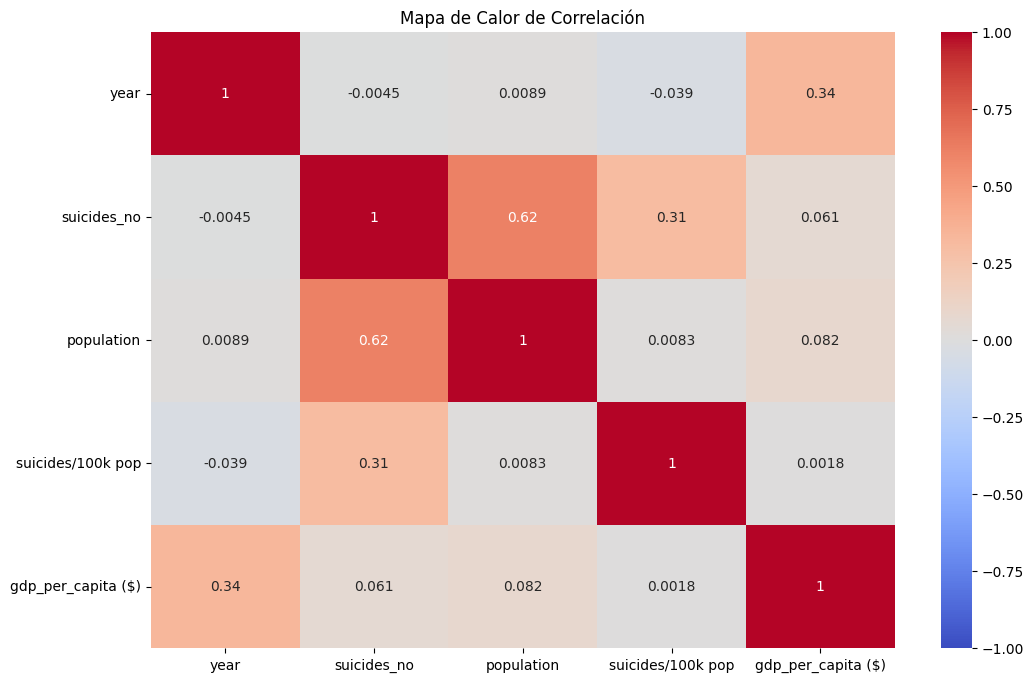

In [136]:
# Seleccionar solo las columnas num√©ricas antes de calcular la correlaci√≥n
correlation_matrix = tasa_suicidios.select_dtypes(include=['float', 'int']).corr()

# Graficar el mapa de calor de correlaci√≥n
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaci√≥n')
plt.show()


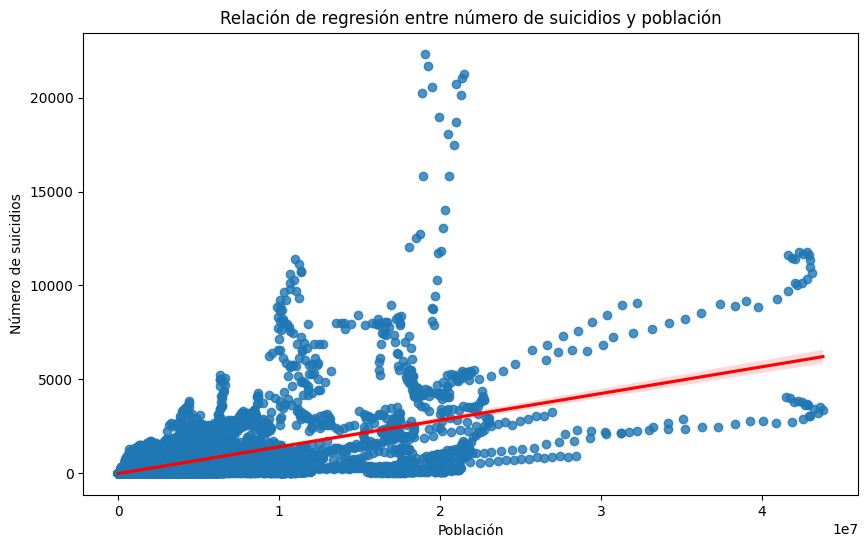

In [137]:
plt.figure(figsize=(10, 6))
sns.regplot(data=tasa_suicidios, x='population', y='suicides_no', line_kws={'color': 'red'})
plt.title('Relaci√≥n de regresi√≥n entre n√∫mero de suicidios y poblaci√≥n')
plt.xlabel('Poblaci√≥n')
plt.ylabel('N√∫mero de suicidios')
plt.show()

In [138]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(tasa_suicidios['population'], tasa_suicidios['suicides_no'])
print(f'Correlaci√≥n de Pearson entre poblaci√≥n y n√∫mero de suicidios: {correlation:.2f}, p-value: {p_value:.4f}')


Correlaci√≥n de Pearson entre poblaci√≥n y n√∫mero de suicidios: 0.62, p-value: 0.0000


In [139]:
correlation, p_value = pearsonr(tasa_suicidios['gdp_per_capita ($)'], tasa_suicidios['suicides_no'])
print(f'Correlaci√≥n de Pearson entre pib per capita y n√∫mero de suicidios: {correlation:.2f}, p-value: {p_value:.4f}')

Correlaci√≥n de Pearson entre pib per capita y n√∫mero de suicidios: 0.06, p-value: 0.0000


‚ú®  El siguiente gr√°fico en el eje Y muestra una lista de pa√≠ses, ordenados de arriba hacia abajo seg√∫n el n√∫mero total de suicidios, desde el pa√≠s con el mayor n√∫mero de suicidios hasta el que tiene el menor. Esto permite una comparaci√≥n r√°pida y clara de cu√°les son los pa√≠ses con mayores tasas de suicidio. El eje X representa el PIB per c√°pita en d√≥lares. Esto permite ver cu√°nto se relaciona el ingreso promedio por persona en cada pa√≠s con el n√∫mero total de suicidios.

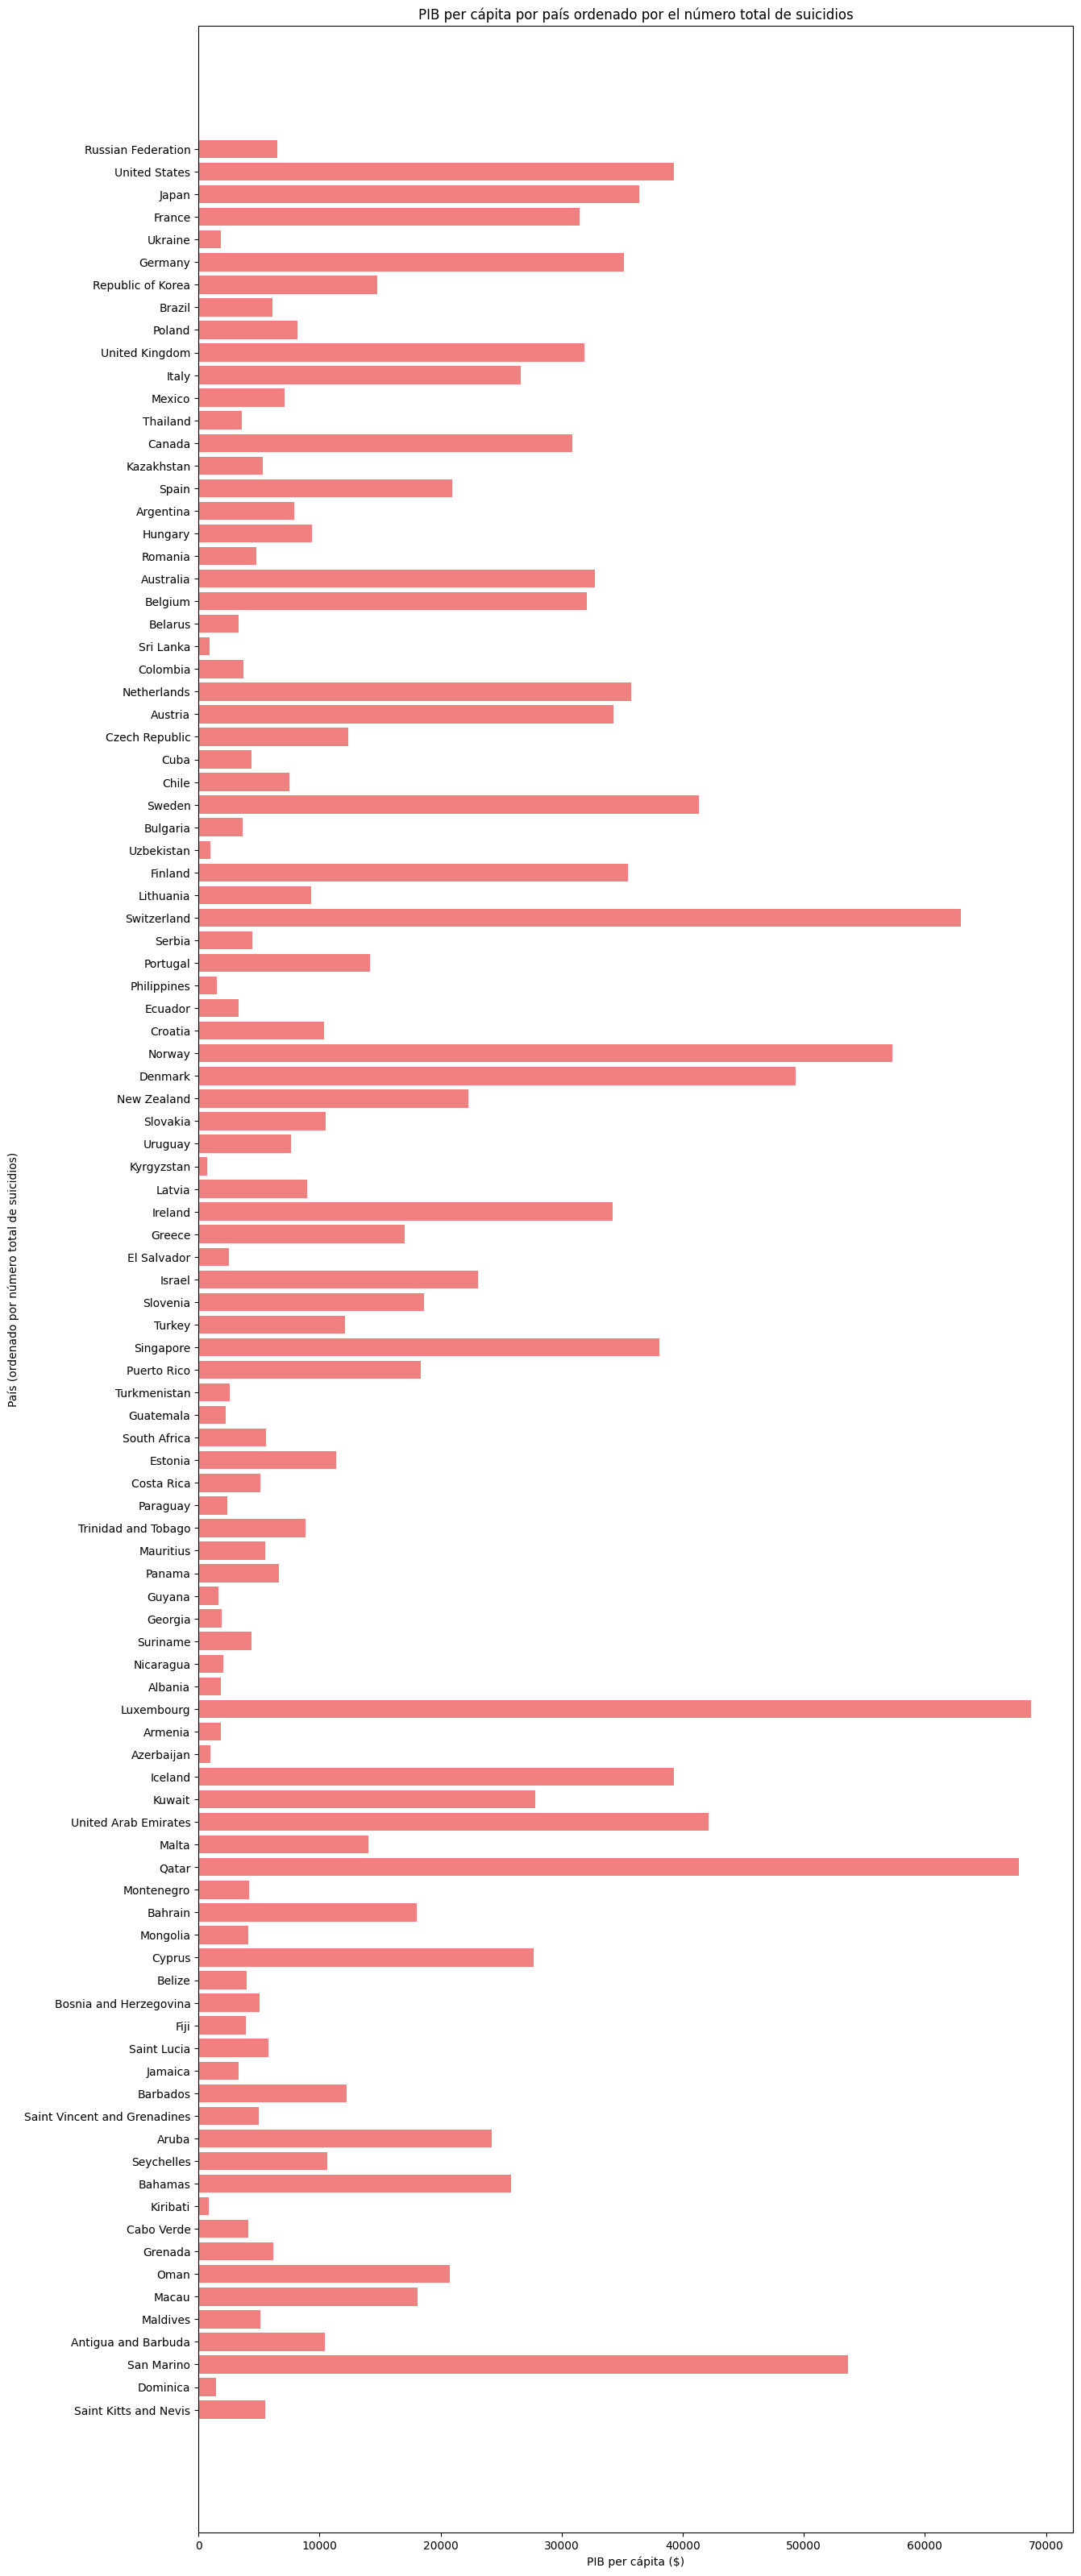

In [140]:
data_by_country = tasa_suicidios.groupby('country').agg({
    'suicides_no': 'sum',
    'gdp_per_capita ($)': 'mean'
}).sort_values(by='suicides_no', ascending=False)  # Ordenado por n√∫mero de suicidios de mayor a menor

# Ajustar el tama√±o de la figura para que sea m√°s alta
plt.figure(figsize=(14, len(data_by_country) * 0.4))  # Ajusta el factor multiplicador seg√∫n sea necesario

# Crear gr√°fico de barras horizontal
plt.barh(data_by_country.index, data_by_country['gdp_per_capita ($)'], color='lightcoral')
plt.title('PIB per c√°pita por pa√≠s ordenado por el n√∫mero total de suicidios')
plt.ylabel('Pa√≠s (ordenado por n√∫mero total de suicidios)')
plt.xlabel('PIB per c√°pita ($)')
plt.gca().invert_yaxis()  # Invertir el eje y para que el pa√≠s con m√°s suicidios aparezca arriba
plt.show()


‚ú® El siguiente gr√°fico es √∫til para visualizar tanto la distribuci√≥n general de los datos como la presencia de valores at√≠picos.

In [141]:
# Crear un histograma del n√∫mero de suicidios
fig = px.histogram(
    tasa_suicidios, 
    x="suicides_no",  # Cambia esta columna por la que quieres analizar
    nbins=50,
    marginal="box",  # Puedes elegir "rug", "box" o "violin" para mostrar una visualizaci√≥n adicional
    width=640, 
    height=480,
    title="Distribuci√≥n del n√∫mero de suicidios",
)

fig.show()


‚ú®  La siguiente gr√°fica muestra la distribuci√≥n del n√∫mero de suicidios en los 10 pa√≠ses con la mayor cantidad de suicidios. Aqu√≠ se han transformado los datos con una escala logar√≠tmica en el eje y, lo que permite ver mejor las variaciones en los valores, especialmente cuando estos est√°n distribuidos en un rango amplio.

In [142]:
top_countries = tasa_suicidios.groupby("country")["suicides_no"].sum().nlargest(10).index
data_top_countries = tasa_suicidios[tasa_suicidios["country"].isin(top_countries)]

# Crear boxplot del n√∫mero de suicidios para los pa√≠ses con m√°s suicidios
fig = px.box(
    data_top_countries, 
    x="country", 
    y="suicides_no", 
    width=640, 
    height=480,
    log_y=True
)
fig.update_layout(title="Distribuci√≥n del n√∫mero de suicidios en los 10 pa√≠ses con m√°s suicidios")
fig.show()
